##APRENDIZAJE POR REFUERZO 123

CRISTHIAN SEGURA IBARRA

## Contiene mediciones de energía eléctrica recopiladas en una casa ubicada en Sceaux, cerca de París, Francia, durante un período de tiempo que va desde diciembre de 2006 hasta noviembre de 2010, lo que representa un total de 47 meses.

Fecha y Hora: Marca de tiempo que indica cuándo se realizó cada medición.

Global Active Power (GAP): Representa la potencia activa total consumida en la casa en kilovatios.

Voltage (V): Indica el voltaje promedio en la casa.

Sub Metering 1 (SM1): Medición de energía para una subcategoria específica de dispositivos o área de consumo en la casa.

Sub Metering 2 (SM2): Otra medición de energía para una subcategoria específica de dispositivos o área de consumo en la casa.

Sub Metering 3 (SM3): Otra medición de energía para una subcategoria específica de dispositivos o área de consumo en la casa.

Intensity (I): Indica la intensidad promedio de corriente eléctrica en la casa.

Frequency (FR): Representa la frecuencia promedio de la corriente eléctrica suministrada en la casa.

##IMPORTACION Y PREPROCESAMIENTO

In [ ]:
# Plotting library
from matplotlib import pyplot
# se utiliza para el manejo de rutas y directorios.
import os
# Calculo cientifico y vectorial para python
import numpy as np
# Librerias para graficar
import matplotlib.pyplot as plt
import pandas as pd
# Modulo de optimización de scipy
from scipy import optimize
#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split
# para aumentar datos en un dataset
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle


import sklearn as skl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/420/dataset labs/segundoParcial/household_power_consumption.txt', delimiter=',')

<ipython-input-3-cbcb7331fa19>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/420/dataset labs/segundoParcial/household_power_consumption.txt', delimiter=',')


In [ ]:
dataframe_ = data.drop("Date", axis=1)

In [ ]:
df = dataframe_.drop("Time", axis=1)

In [ ]:
# Convertir todas las columnas a valores numéricos (en caso de error, convertir o eliminar las columnas no numéricas)
data = df.apply(pd.to_numeric, errors='coerce')

# Elimina las filas que contienen valores NaN
data.dropna(inplace=True)

# Mostrar un resumen estadístico de todas las columnas
print(data.describe())

       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00   

In [ ]:
print(data)

         Global_active_power  Global_reactive_power  Voltage  \
0                      4.216                  0.418   234.84   
1                      5.360                  0.436   233.63   
2                      5.374                  0.498   233.29   
3                      5.388                  0.502   233.74   
4                      3.666                  0.528   235.68   
...                      ...                    ...      ...   
2075254                0.946                  0.000   240.43   
2075255                0.944                  0.000   240.00   
2075256                0.938                  0.000   239.82   
2075257                0.934                  0.000   239.70   
2075258                0.932                  0.000   239.55   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0                    18.4             0.0             1.0            17.0  
1                    23.0             0.0             1.0            16.0  
2  

In [ ]:
# Dividimos el 10% de los datos en test_data
_, dataset = train_test_split(data, test_size=0.03, random_state=42)

In [ ]:
print(dataset)

         Global_active_power  Global_reactive_power  Voltage  \
1030580                1.502                  0.074   240.17   
1815                   0.374                  0.264   245.50   
1295977                0.620                  0.300   239.85   
206669                 0.280                  0.200   235.72   
1048893                1.372                  0.054   243.95   
...                      ...                    ...      ...   
1117704                1.786                  0.000   242.88   
1575738                0.416                  0.140   251.21   
382540                 0.208                  0.102   239.67   
1709872                0.244                  0.000   244.25   
995475                 0.470                  0.204   241.08   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
1030580               6.4             0.0             0.0            18.0  
1815                  1.8             0.0             2.0             0.0  
129

##NORMALIZACION DE DATOS

In [ ]:
def  featureNormalize(X):
    #X_norm = X.copy()
    #mu = np.zeros(X.shape[1])
    #sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados
data_norm, mu, sigma = featureNormalize(dataset)

In [ ]:
print(data_norm)

         Global_active_power  Global_reactive_power   Voltage  \
1030580             0.385114              -0.449482 -0.201752   
1815               -0.679855               1.236329  1.442902   
1295977            -0.447601               1.555746 -0.300493   
206669             -0.768603               0.668477 -1.574869   
1048893             0.262378              -0.626936  0.964626   
...                      ...                    ...       ...   
1117704             0.653244              -1.106061  0.634461   
1575738            -0.640202               0.136115  3.204812   
382540             -0.836579              -0.201047 -0.356035   
1709872            -0.802591              -1.106061  1.057195   
995475             -0.589220               0.703967  0.079043   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
1030580          0.396166       -0.184032       -0.221930        1.358563  
1815            -0.637636       -0.184032        0.123712       -0.

##GRAFICA DE LA SILUETA PARA DETERMINAR EL NUMERO DE CLUSTERS A CONSIDERAR


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

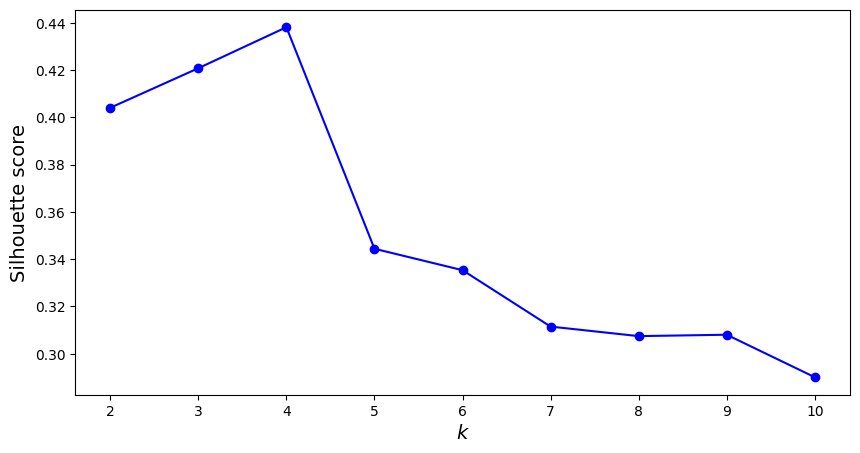

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Creamos una lista de modelos de KMeans ajustados para diferentes números de clusters (de 2 a 20)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data_norm) for k in range(2, 11)]

# Calculamos los coeficientes de silueta para cada modelo KMeans
silhouette_scores = [silhouette_score(data_norm, model.labels_) for model in kmeans_per_k]

plt.figure(figsize=(10, 5))

# Graficar el coeficiente de silueta en función del número de clusters (de 2 a 20)
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()


##SE CONSIDERA EL MAYOR VALOR DE SILUETA YA QUE INDICA UNA MEJOR AGRUPACION

In [ ]:
from sklearn.cluster import KMeans

k = 4  # Números de clusters

# Instanciamos el modelo KMeans con el número de clusters k
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajustar el modelo KMeans a los datos y transformar los datos en distancias de cada punto a los centroides de los clusters
X_digits_dist = kmeans.fit_transform(data_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##OBTENCION DE LAS MAS REPRESENTATIVAS

In [ ]:
# Encontrar el índice del punto más cercano a cada centroide (cluster)
idxs = np.argmin(X_digits_dist, axis=0)

# Seleccionar los puntos representativos (centroides) de cada cluster
X_representative_digits = data_norm.values[idxs]

##SE CREA UN ARRAY DE LABELS SEGUN EL NUMERO DE CLUSTERS

In [ ]:
# Crear un array con los valores del 0 al 3
y_representative_digits = np.arange(4)

# Mostramos las etiquetas de las muestras representativas
print(y_representative_digits.shape)
print(y_representative_digits)

(4,)
[0 1 2 3]


##PROPAGACION DE LOS LABELS

In [ ]:
# Crear un array vacío para almacenar las etiquetas propagadas
y_train_propagated = np.empty(len(data_norm))

# Iterar sobre cada cluster (i) generado por KMeans
for i in range(k):
    # Asignamos las etiquetas de los datos representativos del cluster (i) a todos los puntos del mismo cluster en data_norm
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

##ENTRENAMIENTO SOLO CON LOS MAS REPRESENTATIVOS Y TESTEO DE TODOS LOS DATOS CON  DICHO ENTRENAMIENTO


In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear un clasificador de regresión logística
log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=10000, random_state=42)

# Entrenar el clasificador con los datos representativos y sus etiquetas
%time log_reg2.fit(X_representative_digits, y_representative_digits)

# Calcular el puntaje de precisión del clasificador en el conjunto de prueba
log_reg2.score(data_norm,y_train_propagated )

CPU times: user 17.7 ms, sys: 960 µs, total: 18.7 ms
Wall time: 39.8 ms


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.9794076025960083

In [ ]:
print(y_train_propagated.shape)
print(data_norm.shape)

(61479,)
(61479, 7)


In [ ]:
print(y_train_propagated)
print(data_norm)

[0. 1. 1. ... 1. 1. 1.]
         Global_active_power  Global_reactive_power   Voltage  \
1030580             0.385114              -0.449482 -0.201752   
1815               -0.679855               1.236329  1.442902   
1295977            -0.447601               1.555746 -0.300493   
206669             -0.768603               0.668477 -1.574869   
1048893             0.262378              -0.626936  0.964626   
...                      ...                    ...       ...   
1117704             0.653244              -1.106061  0.634461   
1575738            -0.640202               0.136115  3.204812   
382540             -0.836579              -0.201047 -0.356035   
1709872            -0.802591              -1.106061  1.057195   
995475             -0.589220               0.703967  0.079043   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
1030580          0.396166       -0.184032       -0.221930        1.358563  
1815            -0.637636       -0.184032  

##ENTRENAMIENTO CON TODOS LOS DATOS Y TESTEO DEL MISMO

In [ ]:
# Creamos un clasificador de regresión logística con las etiquetas propagadas
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=10000, random_state=42)
%time log_reg3.fit(data_norm, y_train_propagated)
log_reg3.score(data_norm, y_train_propagated)

CPU times: user 779 ms, sys: 464 ms, total: 1.24 s
Wall time: 654 ms


0.9955431936108264